In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.__version__

'0.9.0'

## Import and inspect data

In [3]:
#import the csv file
df=pd.read_csv("Uber Request Data.csv")

In [4]:
#display the data imported
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
#do some initial inspection of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [7]:
df.shape

(6745, 6)

## Cleaning the data

In [8]:
#column wise null count

df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
df.loc[df['Status']=='Cancelled',:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 2831 to 4094
Data columns (total 6 columns):
Request id           1264 non-null int64
Pickup point         1264 non-null object
Driver id            1264 non-null float64
Status               1264 non-null object
Request timestamp    1264 non-null object
Drop timestamp       0 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 69.1+ KB


In [10]:
df.loc[df['Status']=='No Cars Available',:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 4095 to 6744
Data columns (total 6 columns):
Request id           2650 non-null int64
Pickup point         2650 non-null object
Driver id            0 non-null float64
Status               2650 non-null object
Request timestamp    2650 non-null object
Drop timestamp       0 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 144.9+ KB


we see that we have 2650 null values for driver id column, its because in that case we have status=No cars available
also we see that drop timestamp has 3914 null values, its because 1264+2650=3914(status=cancelled+no cars available)
Therefore there is no need to remove the NA values from the 'Driver id' column.
We can instead drop the 'Driver id' column as its not needed for any analysis.

In [11]:
#drop the 'driver id' column
df= df.drop('Driver id', axis=1)

In [12]:
df.isnull().sum()

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

## converting the date columns to proper format

In [13]:
#convert the Request timestamp and Drop timestamp to correct date format

#first replace the '/' with '-'

df['Request timestamp']=df['Request timestamp'].str.replace('/','-')
df['Drop timestamp']=df['Drop timestamp'].str.replace('/','-')

In [14]:
df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,11-7-2016 11:51,11-7-2016 13:00
1,867,Airport,Trip Completed,11-7-2016 17:57,11-7-2016 18:47
2,1807,City,Trip Completed,12-7-2016 9:17,12-7-2016 9:58
3,2532,Airport,Trip Completed,12-7-2016 21:08,12-7-2016 22:03
4,3112,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [15]:
# convert to correct data type
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 263.6+ KB


In [17]:
df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [18]:
# check for any duplicated records
sum(df.duplicated())

0

## create new derived variables

In [19]:
df['hour']=df['Request timestamp'].dt.hour

In [20]:
df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,hour
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [21]:
#create different segments based on pickup time

In [22]:
def slotfunc(x):
    if x>=4 and x<8:
        return 'Early Morning'
    elif x>=8 and x<12:
        return 'Morning'
    elif x>=12 and x<16:
        return 'Afternoon'
    elif x>=16 and x<20:
        return 'Evening'
    elif x>=20 and x<=23:
        return 'Night'
    elif x>=0 and x<4:
        return 'Late Night'

In [23]:
df['Time slots']=df.hour.apply(slotfunc)

In [24]:
df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,hour,Time slots
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


## Plotting


### 1. Visually identify the most pressing problems for Uber. 
Hint: Create plots to visualise the frequency of requests that get cancelled or show 'no cars available'; identify the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots

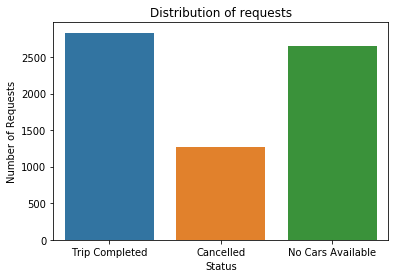

In [25]:
# First check the number of requests generated for the given data.
sns.countplot(x="Status", data=df)
plt.title("Distribution of requests")
plt.ylabel("Number of Requests")
plt.show()

We can see a considerable high number of requests that resulted in "No cars avaialble" and a fairly good number of "Cancelled" status too

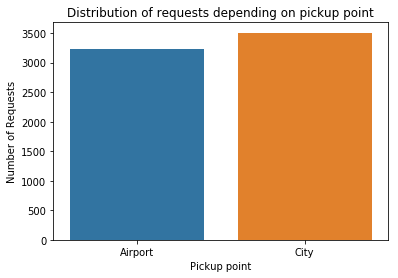

In [26]:
# Analyze the number of requests depending on the pickup point.
sns.countplot(x='Pickup point',data=df)
plt.title("Distribution of requests depending on pickup point")
plt.ylabel("Number of Requests")
plt.show()

Number of requests are fairly same considering the pickup point. Therefore demand is similar.

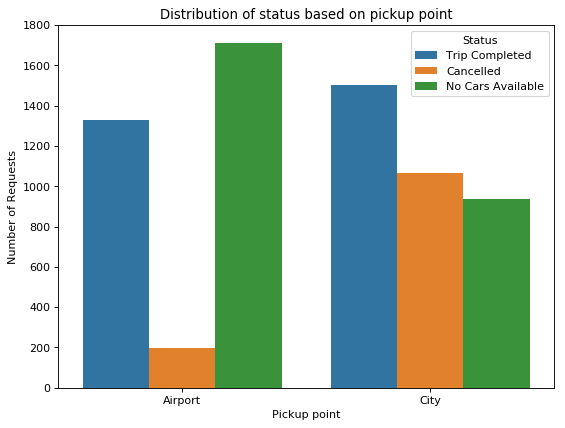

In [27]:
# Analyze the number of request for each status based on the pickup point
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='Pickup point',hue='Status',data=df)
plt.title("Distribution of status based on pickup point")
plt.ylabel("Number of Requests")
plt.show()

Airport-City:
We see highest number of requests with "No Cars Available" status and a low "Cancelled" requests.

City-Airport: 
We see a high number of "Cancelled" requests and a fair amount of "No Cars Available" requests.

"Trip Completed" status are almost same in both cases.

From this data we can tell that when customers are trying to book cabs from airport to city, there are no cabs avaialble. This may be because there is high demand at that time and very less cabs to fulfill the requirement.

On the other hand as more number of cancelled request are from city we can assume that drivers are reluctant to travel to Airport, resulting in more cancelled status for city-airport. 



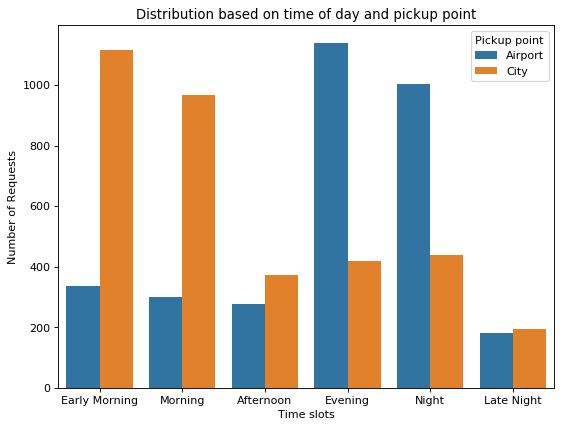

In [28]:
#Analyze the number of request based on the time of the day
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='Time slots',hue='Pickup point',data=df,order= ['Early Morning','Morning','Afternoon','Evening','Night','Late Night'])
plt.title("Distribution based on time of day and pickup point")
plt.ylabel("Number of Requests")
plt.show()

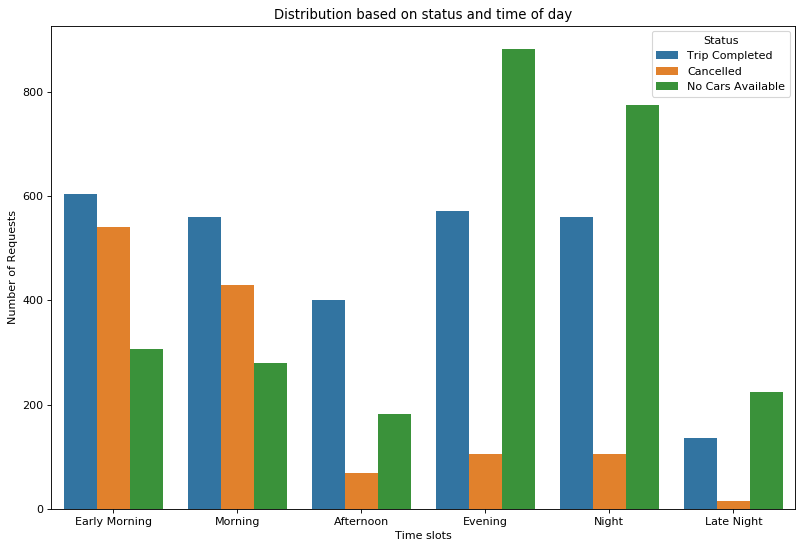

In [29]:
# Analyze the number of requests and status based on the time of the day
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='Time slots',hue="Status",data=df, order= ['Early Morning','Morning','Afternoon','Evening','Night','Late Night'])
plt.title("Distribution based on status and time of day")
plt.ylabel("Number of Requests")
plt.show()

We see here that most 'Cancelled' status are in the early morning and morning time. 
And most 'No car available' status are in the evening and night time.

<function matplotlib.pyplot.show(*args, **kw)>

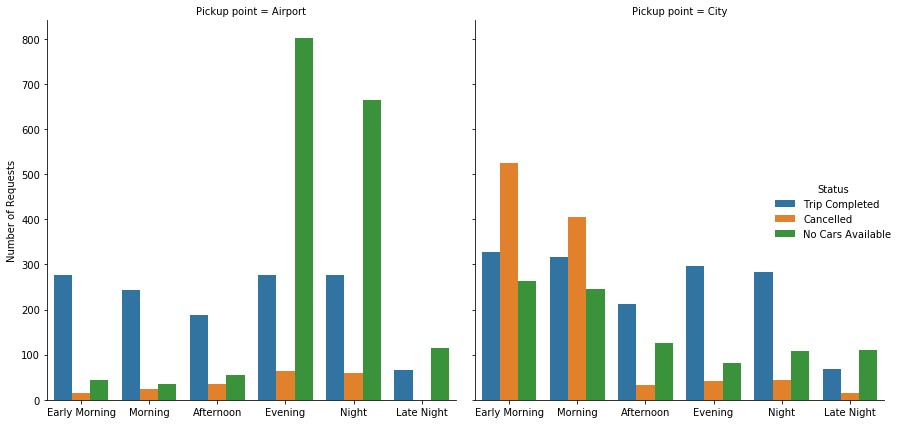

In [30]:
#Analyze the number of requests and status based on the time of the day from city and airport
g=sns.catplot(x='Time slots',hue='Status',col='Pickup point',kind='count',data=df,order= ['Early Morning','Morning','Afternoon','Evening','Night','Late Night'],height=6, aspect=.9)
(g.set_axis_labels("", "Number of Requests"))
plt.tight_layout()
plt.show

Here the analysis becomes more clear.
When pickup is from airport, we see more "No car avaialble" status during evening and night. More flights arrive at this time and there is more demand to go to city from airport. Also the number of requests during this time is less from city.
When pickup is from city, we see more "cancelled" status during the early morning and morning time. Also number of requests from airport is also less during this time. This means that there is more demand to go to airport during this time as most flight departures are during this time.
As there are less arriving flights during morning time, drivers tend to cancel the requests to go to airport as they might not get a ride back to city during this time.

### 2. Find out the gap between supply and demand and show the same using plots.
Find the time slots when the highest gap exists
Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

In [31]:
#create a function to assign "Supply/Gap based on the status of trip".
#Supply=Trip Completed
#Gap=Cancelled+No cars Available

def statfunc(x):
    if (x == 'Trip Completed'):
        return 'Supply'
    elif (x == 'Cancelled'):
        return 'Gap'
    elif (x == 'No Cars Available'):
        return 'Gap'
    

In [32]:
df['supply/gap']=df.Status.apply(statfunc)

In [33]:
df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,hour,Time slots,supply/gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning,Supply
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,Supply
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,Supply
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,Supply
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,Supply


<function matplotlib.pyplot.show(*args, **kw)>

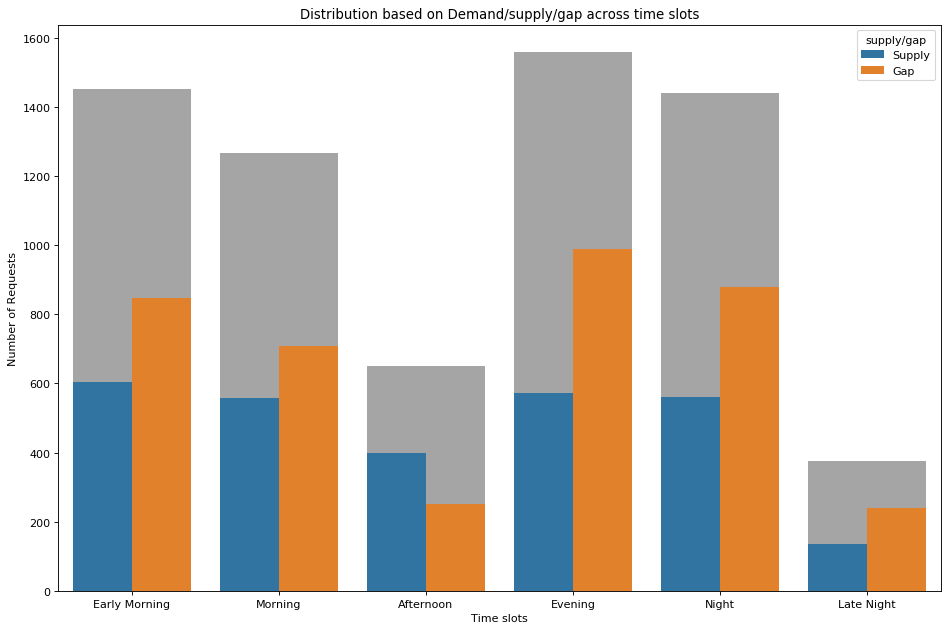

In [34]:
#Analyze the distribution of Demand/supply/gap based on the time slots
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
d=sns.countplot(x='Time slots',data=df, color="#a5a5a5",order= ['Early Morning','Morning','Afternoon','Evening','Night','Late Night'])
d=sns.countplot(x='Time slots',hue="supply/gap",data=df, order= ['Early Morning','Morning','Afternoon','Evening','Night','Late Night'])
plt.title("Distribution based on Demand/supply/gap across time slots")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

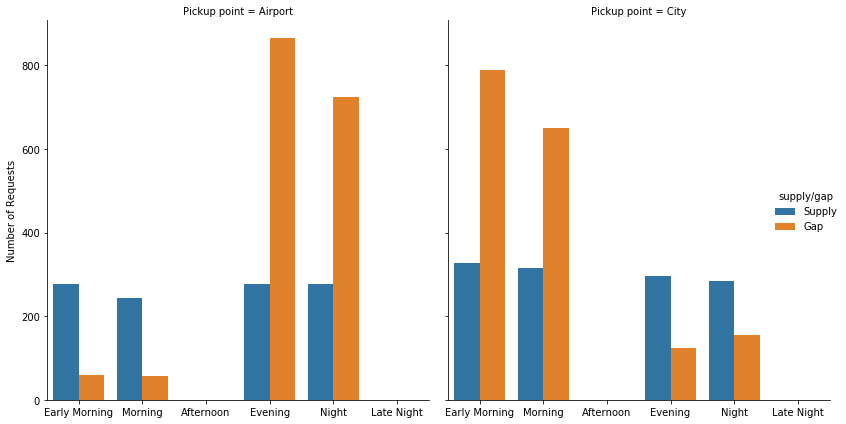

In [35]:
#Analyze the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots
g=sns.catplot(x='Time slots',hue='supply/gap',col='Pickup point',kind='count',data=df.loc[(df['Time slots']== 'Evening') | (df['Time slots']== 'Night') | (df['Time slots']== 'Early Morning') |(df['Time slots']== 'Morning')],order= ['Early Morning','Morning','Afternoon','Evening','Night','Late Night'],height=6, aspect=.9)
(g.set_axis_labels("", "Number of Requests"))
plt.tight_layout()
plt.show

In this plot we can clearly identify that requests from airport suffer the most gap during Evening and Night. Request from city suffer the most gap during Early morning and morning.
Supply is almost similar in both city and airport.
This is the most concerning sector where Uber is losing business due to gap to meet the demand.
There is scope of improvement here the most.